# Convolution Addition

The sum of two independent distributions is the convolution of the distributions.  We could represent this as letting Z = X + Y.  To show this is true, we may assume that Z takes on a particular value z, and we can assume that X takes on some value x.  If that is true, then the only way the addition would hold true would be if y were to take on the value z - x.  The implication is that if the event Z = z is true, the disjoint events X = x and Y = z - x are also simultaneously true.  We can then compute the probably that Z = z over all values as the integral of the disjoint probabilities (hence the product of them) X = x and Y = z - x.  This is precisely the definition of convolution, hence the sum of two independent distributions is their convolution.  A good further resource regarding this is [Chapter 7 of Dartmouth's Chance book](../docs/Chance.pdf).

To see this in action, we can simply generate two Gaussians as histograms on the same support, then convolve them.  This will be off by a constant related to the convolution computation and the change in variance.  As you can see, unlike when you pointwise add the distributions, where you get a lot of spurious noise particularly near the mean, the convolution is a much smoother representation of the distribution of the sum.

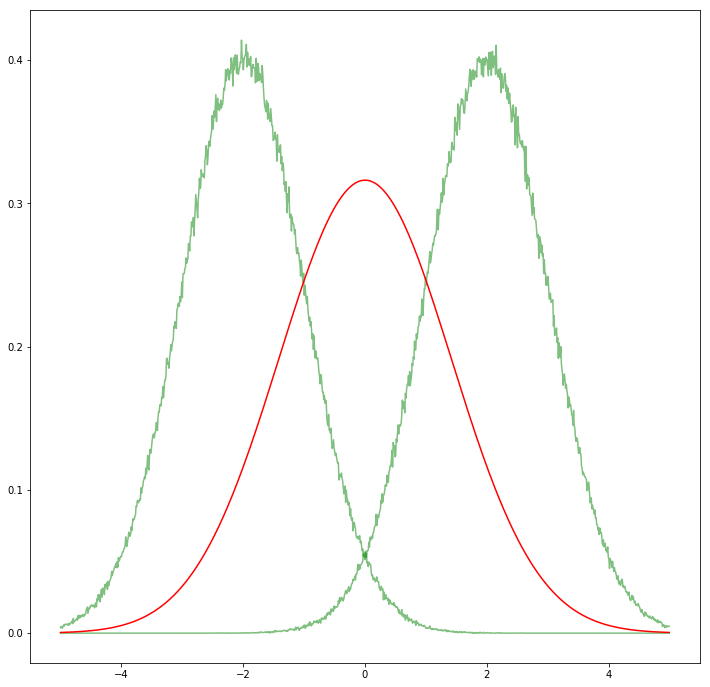

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,12))

# First Gaussian
g1 = [np.random.normal(-2, 1) for x in range(1000000)]
v1, e1 = np.histogram(g1, bins=1000, range=(-5,5), density=True)
sup = [(e1[i] + e1[i+1]) / 2 for i in range(len(e1)-1)]
plt.plot(sup, v1, color='green', alpha=0.5)    
    
# Second Gaussian
g2 = [np.random.normal(2, 1) for x in range(1000000)]
v2, _ = np.histogram(g2, bins=1000, range=(-5,5), density=True)
plt.plot(sup, v2, color='green', alpha=0.5)

# Convolution 
v = np.convolve(v1, v2, mode='same')

# Normalization
norm = 1.0 / math.sqrt(8000)
v = [x * norm for x in v]
plt.plot(sup, v, color='red')

plt.show()